In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [16]:
df = pd.read_csv(r"C:\\Users\\yashs\\OneDrive\\Desktop\\jupyter projects\\spam.csv", encoding='latin-1')[['Category', 'Message']]

In [17]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.dropna(subset=['Message'], inplace=True)

In [19]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size=0.2, 
random_state=42) 

In [21]:
vectorizer = CountVectorizer() 
X_train_counts = vectorizer.fit_transform(X_train) 
X_test_counts = vectorizer.transform(X_test)

In [22]:


model = MultinomialNB()
model.fit(X_train_counts, y_train)


MultinomialNB()

In [23]:
y_pred = model.predict(X_test_counts)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9928251121076234

Confusion Matrix:
 [[966   0]
 [  8 141]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [25]:
def predict_message(msg):
 msg_vector = vectorizer.transform([msg])
 predicƟon = model.predict(msg_vector)
 return "Spam" if predicƟon[0] == 1 else "Not Spam"

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

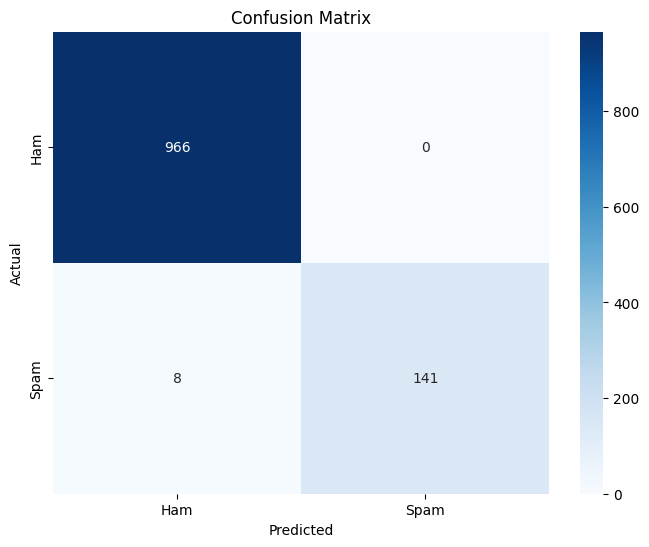

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()